<style>
@import url(https://www.numfys.net/static/css/nbstyle.css);
</style>
<a href="https://www.numfys.net"><img class="logo" /></a>

# Алгоритм деления пополам

### Modules - Root Finding
<section class="post-meta">
By Magnus A. Gjennestad, Vegard Hagen, Aksel Kvaal, Morten Vassvik, Trygve B. Wiig and Peter Berg
</section>
Last edited: February 23th 2018 
___

### Задача

Как мы можем найти корень $x_0$ для функции $f(x)$, т.e.
$$f(x_0) = 0,$$
если недоступно аналитическое решение?

Обратите внимание, что может быть несколько корней, и мы хотели бы иметь некоторый контроль над тем, какой корень вычисляется.

### Пример

Мы хотели бы знать, где функция $g(x) = x$ пересекает функцию $h(x) = e^{-x}$. Другими словами, нам нужно решить
$$x = e^{-x}.$$
Это эквивалентно нахождению корня $f(x) = e^{-x} − x = 0:$
$$f(x_0)=e^{−x_0} −x_0 =0.$$
Давайте построим график двух функций g и h, чтобы определить, может ли быть корень и, если да, то где приблизительно.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Set common figure parameters
newparams = {'figure.figsize': (16, 6), 'axes.grid': True,
             'lines.linewidth': 1.5, 'lines.markersize': 10,
             'font.size': 14}
plt.rcParams.update(newparams)

Text(0, 0.5, '$g(x)$, $h(x)$')

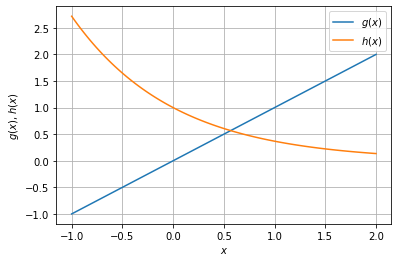

In [4]:
x = np.linspace(-1, 2, 100)
g = x
h = np.exp(-x)

plt.plot(x, g, x, h)
plt.legend([r'$g(x)$', r'$h(x)$'])
plt.xlabel(r'$x$')
plt.ylabel(r'$g(x)$, $h(x)$')

Мы видим, что пересечение появляется около $x = 0.6$. Поскольку и $g$, и $h$ являются монотонными функциями, они пересекаются только один раз. Соответственно, f должна иметь один уникальный корень вблизи x = 0.6, как показано на графике ниже.

Text(0, 0.5, '$f(x)$')

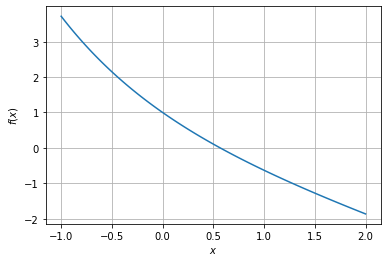

In [5]:
f = np.exp(-x) - x

plt.plot(x, f)
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
#plt.grid();

Как мы можем найти этот корень?

Ну, мы знаем, что корень определенно лежит между $x = 0$ и $x = 1$, так как $f(x)$ монотонно уменьшается, а
$$f(0) = 1$$
и, следовательно, она положительна, и
$$f(1) = \frac{1}{e} − 1 = −0.6321,$$
следовательно, в единице она отрицательна. Корень должен лежать где-то посередине.

Стратегия теперь заключается в том, чтобы "обнулить" значение функции, проверяя ее все ближе и ближе к (неизвестному) корню.

Для этого давайте разделим интервал $[0, 1]$, граничные точки которого мы только что изучили, на две половины, выбрав среднюю точку $x = 0.5$. Значение $f$ в средней точке равно
$$f (0.5) = 0.1065,$$
число положительное. Поскольку $f(1) < 0$, теперь мы знаем, что корень лежит где-то между $x = 0.5$ и $x = 1$. Аналогично последнему шагу, теперь мы выбираем среднюю точку интервала $[0.5, 1]$, чтобы проверить значение функции:
$$f(0.75) = -0.2776$$
Очевидно, корень должен находиться в интервале $[0.5, 0.75]$.

Мы можем продолжать повторять эти шаги, в результате чего интервалы, в которых должен лежать корень, будут все меньше. Может случиться, хотя это маловероятно, что одна из средних точек, которую мы в конце концов выберем, совпадет с корнем. Однако это весьма необычный случай.
Мы заканчиваем поиск, когда удовлетворены точностью, с которой мы определили корень. Она просто задается шириной последнего интервала. Обратите внимание, что мы не можем превышать машинную точность нашего компьютера, устанавливая ограничение на наше разделение интервалов.
Описанный выше метод называется алгоритмом __деления пополам (бисекции)__.

Теперь мы можем систематически описать алгоритм деления пополам.
Для непрерывной функции $f(x)$, корень, если он существует, может быть аппроксимирован следующим образом:
Нужно найти два значения $x_p$ и $x_m$ такие что $f(x_p) > 0$ и $f(x_m) < 0$. Затем выполните следующие действия:
1. Выбрать среднюю точку $x_\mathrm{next} = \frac{x_p+x_m}{2}.$
2. Если $f(x_\mathrm{next})$ имеет тот же знак, что и $f(x_p)$, то мы устанавливаем $x_p = x_\mathrm{next}$.
3. В противном случае мы устанавливаем $x_m = x_\mathrm{next}$.
4. Повторять предыдущие три шага до тех пор, пока не будет достигнута желаемая точность.

Все очень просто. Давайте определим корень из $f(x)$ с заданной точностью.

In [6]:
acc = 1e-15  # Точность

x_p = 1      # Начальное значение x_p
x_m = 0      # Начальное значение x_m
diff = abs(x_p - x_m)  # Длина интервала

while diff > acc:
    x_next = (x_p+x_m)/2  # Деление интервала пополам
    
    f_p = np.exp(-x_p) - x_p          # значение f при x_p
    f_next = np.exp(-x_next) - x_next # Значение f в средней точке
    
    if (f_p*f_next) > 0:
        x_p = x_next
    else:
        x_m = x_next
        
    diff = abs(x_p - x_m)

print(r'Корень f(x) равен %f.' % x_p)

Корень f(x) равен 0.567143.


### Заключительные замечания

Мы не делаем различия между $x_p < x_m$ или $x_m < x_p$. Это не имеет никакого отношения к результату.
Если есть несколько корней, наше первоначальное предположение для $x_p$ и $x_m$ определит, какой конкретно корень мы находим.
Однако необходимо иметь ввиду случаи, когда более одного корня лежит в нашем начальном интервале $[x_p,x_m]$ или $[x_m,x_p]$ соответственно.